### Here, we look at the dataset generated with Data_Acquisition_and_Analysis_IC50.

### This follows the tutorial referenced in the above Jupyter notebook with changes made as needed.

### Molecules are screened whether they fulfill or violate Lipinski's Rule of 5.

### Imatinib does fulfill the criteria, radar plots are used to show how the groups of molecules are distributed for those that fulfill or violate the Ro5.

In [35]:
import math

import warnings
warnings.filterwarnings('ignore')  # There is a pandas issue that does not affect output

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools

In [2]:
# Read in the file we generated previously
molecules = pd.read_csv('ABL_compounds.csv', index_col=0)
print(molecules.shape)
molecules.head()

(1415, 5)


,molecule_chembl_id,IC50,units,smiles,pIC50
0,CHEMBL2347725,0.015,nM,COc1ccccc1-c1ccc2nc(NC(=O)NCCN3CCN(C)CC3)sc2c1,10.823909
1,CHEMBL2347722,0.021,nM,COc1ccccc1-c1ccc2nc(NC(=O)NCCN3CCOCC3)sc2c1,10.677781
2,CHEMBL2347711,0.064,nM,CCNC(=O)Nc1nc2ccc(-c3ccccc3OCC)cc2s1,10.193820
3,CHEMBL2347723,0.064,nM,COc1ccccc1-c1ccc2nc(NC(=O)NCCO)sc2c1,10.193820
4,CHEMBL2347719,0.110,nM,CCNC(=O)Nc1nc2ccc(-c3ccc(N)cc3OC)cc2s1,9.958607


In [4]:
def calculate_ro5_properties(smiles):
    """
    Test if input molecule (SMILES) fulfills Lipinski's rule of five.

    Parameters
    ----------
    smiles : str
        SMILES for a molecule.

    Returns
    -------
    pandas.Series
        Molecular weight, number of hydrogen bond acceptors/donor and logP value
        and Lipinski's rule of five compliance for input molecule.
    """
    # RDKit molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    # Calculate Ro5-relevant chemical properties
    molecular_weight = Descriptors.ExactMolWt(molecule)
    n_hba = Descriptors.NumHAcceptors(molecule)
    n_hbd = Descriptors.NumHDonors(molecule)
    logp = Descriptors.MolLogP(molecule)
    # Check if Ro5 conditions fulfilled
    conditions = [molecular_weight <= 500, n_hba <= 10, n_hbd <= 5, logp <= 5]
    ro5_fulfilled = sum(conditions) >= 3
    # Return True if no more than one out of four conditions is violated
    return pd.Series(
        [molecular_weight, n_hba, n_hbd, logp, ro5_fulfilled],
        index=["molecular_weight", "n_hba", "n_hbd", "logp", "ro5_fulfilled"],
    )

In [5]:
# This takes a couple of seconds
ro5_properties = molecules["smiles"].apply(calculate_ro5_properties)
ro5_properties.head()

,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,425.188546,6,2,3.3408,True
1,412.156912,6,2,3.4256,True
2,341.119798,4,2,4.5034,True
3,343.099062,5,3,3.0857,True
4,342.115047,5,3,3.6955,True


In [6]:
# Merge molecules and ro5_properties
molecules = pd.concat([molecules, ro5_properties], axis=1)
molecules.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,CHEMBL2347725,0.015,nM,COc1ccccc1-c1ccc2nc(NC(=O)NCCN3CCN(C)CC3)sc2c1,10.823909,425.188546,6,2,3.3408,True
1,CHEMBL2347722,0.021,nM,COc1ccccc1-c1ccc2nc(NC(=O)NCCN3CCOCC3)sc2c1,10.677781,412.156912,6,2,3.4256,True
2,CHEMBL2347711,0.064,nM,CCNC(=O)Nc1nc2ccc(-c3ccccc3OCC)cc2s1,10.193820,341.119798,4,2,4.5034,True
3,CHEMBL2347723,0.064,nM,COc1ccccc1-c1ccc2nc(NC(=O)NCCO)sc2c1,10.193820,343.099062,5,3,3.0857,True
4,CHEMBL2347719,0.110,nM,CCNC(=O)Nc1nc2ccc(-c3ccc(N)cc3OC)cc2s1,9.958607,342.115047,5,3,3.6955,True


In [7]:
# Note that the column "ro5_fulfilled" contains boolean values.
# Thus, we can use the column values directly to subset data.
# Note that ~ negates boolean values.
molecules_ro5_fulfilled = molecules[molecules["ro5_fulfilled"]]
molecules_ro5_violated = molecules[~molecules["ro5_fulfilled"]]

print(f"# compounds in unfiltered data set: {molecules.shape[0]}")
print(f"# compounds in filtered data set: {molecules_ro5_fulfilled.shape[0]}")
print(f"# compounds not compliant with the Ro5: {molecules_ro5_violated.shape[0]}")

# compounds in unfiltered data set: 1415
# compounds in filtered data set: 1224
# compounds not compliant with the Ro5: 191


In [9]:
# Save filtered data
molecules_ro5_fulfilled.to_csv('ABL_compounds_lipinski.csv')
molecules_ro5_fulfilled.head()

,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
0,CHEMBL2347725,0.015,nM,COc1ccccc1-c1ccc2nc(NC(=O)NCCN3CCN(C)CC3)sc2c1,10.823909,425.188546,6,2,3.3408,True
1,CHEMBL2347722,0.021,nM,COc1ccccc1-c1ccc2nc(NC(=O)NCCN3CCOCC3)sc2c1,10.677781,412.156912,6,2,3.4256,True
2,CHEMBL2347711,0.064,nM,CCNC(=O)Nc1nc2ccc(-c3ccccc3OCC)cc2s1,10.193820,341.119798,4,2,4.5034,True
3,CHEMBL2347723,0.064,nM,COc1ccccc1-c1ccc2nc(NC(=O)NCCO)sc2c1,10.193820,343.099062,5,3,3.0857,True
4,CHEMBL2347719,0.110,nM,CCNC(=O)Nc1nc2ccc(-c3ccc(N)cc3OC)cc2s1,9.958607,342.115047,5,3,3.6955,True


### Visualization with radar plots

In [10]:
def calculate_mean_std(dataframe):
    """
    Calculate the mean and standard deviation of a dataset.

    Parameters
    ----------
    dataframe : pd.DataFrame
        Properties (columns) for a set of items (rows).

    Returns
    -------
    pd.DataFrame
        Mean and standard deviation (columns) for different properties (rows).
    """
    # Generate descriptive statistics for property columns
    stats = dataframe.describe()
    # Transpose DataFrame (statistical measures = columns)
    stats = stats.T
    # Select mean and standard deviation
    stats = stats[["mean", "std"]]
    return stats

In [12]:
# Stats for molecules that fulfill the ro5
molecules_ro5_fulfilled_stats = calculate_mean_std(
    molecules_ro5_fulfilled[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_fulfilled_stats

,mean,std
molecular_weight,422.616938,81.784560
n_hba,6.089869,1.426336
n_hbd,2.068627,0.877741
logp,3.800700,1.042149


In [13]:
# Stats for molecules that violated the ro5
molecules_ro5_violated_stats = calculate_mean_std(
    molecules_ro5_violated[["molecular_weight", "n_hba", "n_hbd", "logp"]]
)
molecules_ro5_violated_stats

,mean,std
molecular_weight,585.602551,149.458421
n_hba,7.157068,2.161004
n_hbd,2.958115,3.003213
logp,5.522567,1.688466


In [14]:
def _scale_by_thresholds(stats, thresholds, scaled_threshold):
    """
    Scale values for different properties that have each an individually defined threshold.

    Parameters
    ----------
    stats : pd.DataFrame
        Dataframe with "mean" and "std" (columns) for each physicochemical property (rows).
    thresholds : dict of str: int
        Thresholds defined for each property.
    scaled_threshold : int or float
        Scaled thresholds across all properties.

    Returns
    -------
    pd.DataFrame
        DataFrame with scaled means and standard deviations for each physiochemical property.
    """
    # Raise error if scaling keys and data_stats indicies are not matching
    for property_name in stats.index:
        if property_name not in thresholds.keys():
            raise KeyError(f"Add property '{property_name}' to scaling variable.")
    # Scale property data
    stats_scaled = stats.apply(lambda x: x / thresholds[x.name] * scaled_threshold, axis=1)
    return stats_scaled

In [15]:
def _define_radial_axes_angles(n_axes):
    """Define angles (radians) for radial (x-)axes depending on the number of axes."""
    x_angles = [i / float(n_axes) * 2 * math.pi for i in range(n_axes)]
    x_angles += x_angles[:1]
    return x_angles

In [32]:
def plot_radar(
    y,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max=None,
    output_path=None,
):
    """
    Plot a radar chart based on the mean and standard deviation of a data set's properties.

    Parameters
    ----------
    y : pd.DataFrame
        Dataframe with "mean" and "std" (columns) for each physicochemical property (rows).
    thresholds : dict of str: int
        Thresholds defined for each property.
    scaled_threshold : int or float
        Scaled thresholds across all properties.
    properties_labels : list of str
        List of property names to be used as labels in the plot.
    y_max : None or int or float
        Set maximum y value. If None, let matplotlib decide.
    output_path : None or pathlib.Path
        If not None, save plot to file.
    """

    # Define radial x-axes angles -- uses our helper function!
    x = _define_radial_axes_angles(len(y))
    # Scale y-axis values with respect to a defined threshold -- uses our helper function!
    y = _scale_by_thresholds(y, thresholds, scaled_threshold)
    # Since our chart will be circular we append the first value of each property to the end
    y = y.append(y.iloc[0])


    # Set figure and subplot axis
    plt.figure(figsize=(6, 6))
    ax = plt.subplot(111, polar=True)

    # Plot data
    ax.fill(x, [scaled_threshold] * 5, "cornflowerblue", alpha=0.2)
    ax.plot(x, y["mean"], "b", lw=3, ls="-")
    ax.plot(x, y["mean"] + y["std"], "orange", lw=2, ls="--")
    ax.plot(x, y["mean"] - y["std"], "orange", lw=2, ls="-.")

    # From here on, we only do plot cosmetics
    # Set 0° to 12 o'clock
    ax.set_theta_offset(math.pi / 2)
    # Set clockwise rotation
    ax.set_theta_direction(-1)

    # Set y-labels next to 180° radius axis
    ax.set_rlabel_position(180)
    # Set number of radial axes' ticks and remove labels
    plt.xticks(x, [])
    # Get maximal y-ticks value
    if not y_max:
        y_max = int(ax.get_yticks()[-1])
    # Set axes limits
    plt.ylim(0, y_max)
    # Set number and labels of y axis ticks
    plt.yticks(
        range(1, y_max),
        ["5" if i == scaled_threshold else "" for i in range(1, y_max)],
        fontsize=16,
    )

    # Draw ytick labels to make sure they fit properly
    # Note that we use [:1] to exclude the last element which equals the first element (not needed here)
    for i, (angle, label) in enumerate(zip(x[:-1], properties_labels)):
        if angle == 0:
            ha = "center"
        elif 0 < angle < math.pi:
            ha = "left"
        elif angle == math.pi:
            ha = "center"
        else:
            ha = "right"
        ax.text(
            x=angle,
            y=y_max + 1,
            s=label,
            size=16,
            horizontalalignment=ha,
            verticalalignment="center",
        )

    # Add legend relative to top-left plot
    labels = ("mean", "mean + std", "mean - std", "rule of five area")
    ax.legend(labels, loc=(1.1, 0.7), labelspacing=0.3, fontsize=16)

    # Save plot - use bbox_inches to include text boxes
    if output_path:
        plt.savefig(output_path, dpi=300, bbox_inches="tight", transparent=True)

    plt.show()

In [33]:
thresholds = {"molecular_weight": 500, "n_hba": 10, "n_hbd": 5, "logp": 5}
scaled_threshold = 5
properties_labels = [
    "Molecular weight (Da) / 100",
    "# HBA / 2",
    "# HBD",
    "LogP",
]
y_max = 8

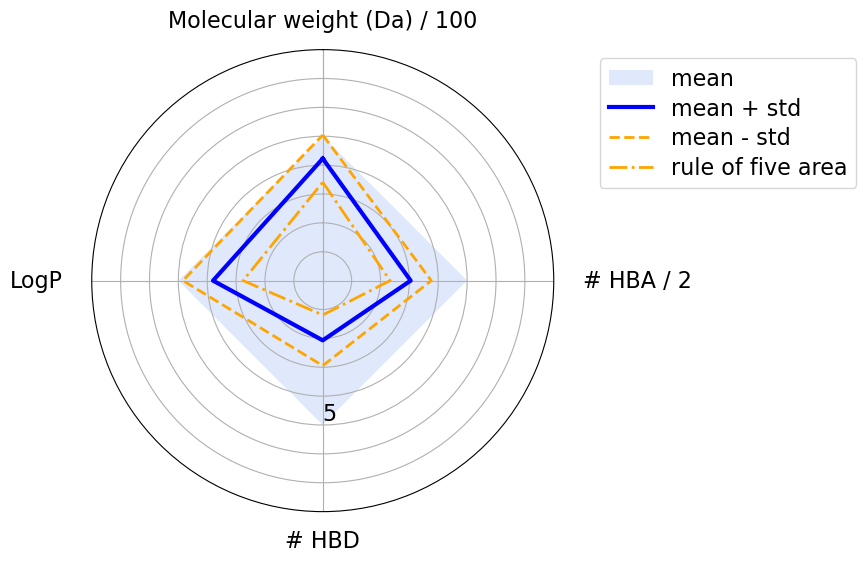

In [36]:
# Radar plot for molecules that fulfill the ro5
plot_radar(
    molecules_ro5_fulfilled_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)

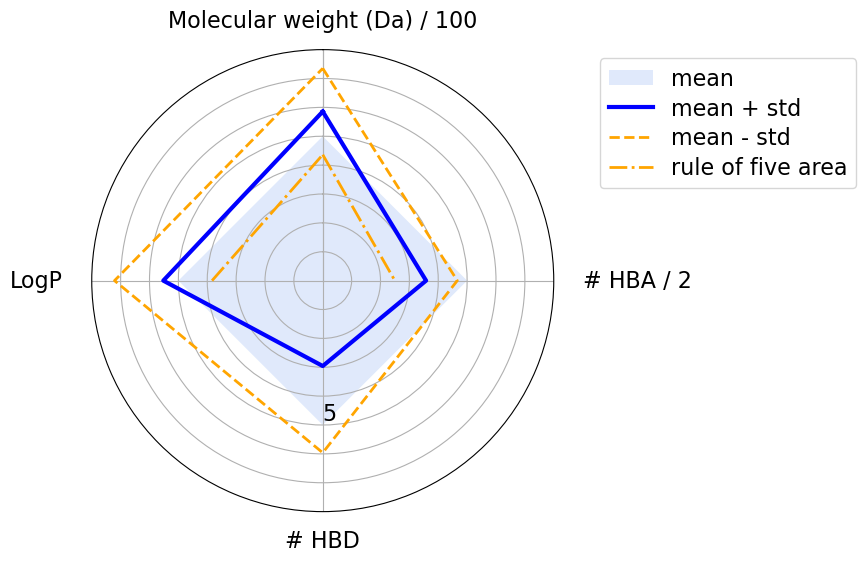

In [37]:
# Radar plot for molecules that violatre the ro5
plot_radar(
    molecules_ro5_violated_stats,
    thresholds,
    scaled_threshold,
    properties_labels,
    y_max,
)

In [43]:
# Sanity check, again let's look at our molecule CHEMBL941
molecules_ro5_fulfilled[molecules_ro5_fulfilled['molecule_chembl_id'] == 'CHEMBL941']

,molecule_chembl_id,IC50,units,smiles,pIC50,molecular_weight,n_hba,n_hbd,logp,ro5_fulfilled
713,CHEMBL941,38.0,nM,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...,7.420216,493.259009,7,2,4.59032,True


### Lipinski's Rule of 5 was used to screen candidate compounds for common ADME criteria.
### For imatinib, we see 7 H-bond acceptors, 2 H-bond donors, a logP = 4.59, and the molecular weight of 493.26 Da which satisfy the Ro5.